Roman CROITOR

# Analyse des commentaires des clients sur la station de ski Les 2 Alpes sur skipass.com

In [1]:
import PyPDF2
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import docx
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
# Load the doc file and extract the text
doc = docx.Document('les2alpes.docx')
text = ''
for paragraph in doc.paragraphs:
    text += paragraph.text

In [4]:
# Preprocess the text by removing non-alphanumeric characters
text = re.sub(r'\W+', ' ', text)
text = re.sub(r'\d+', '', text)
text = re.sub(r'\b(de|la|et|ou|le|du|pour|des|dans|Vous|au|sein|un|à|l|avec|une|en|par|d|Le|Les|les|sur|to|vous|the|and|of|in|a|avez)\b', '', text)
text = re.sub(r'\b(ce|est|qui|ne|se|il|y|n|on|c|m|qu)\b', '', text)

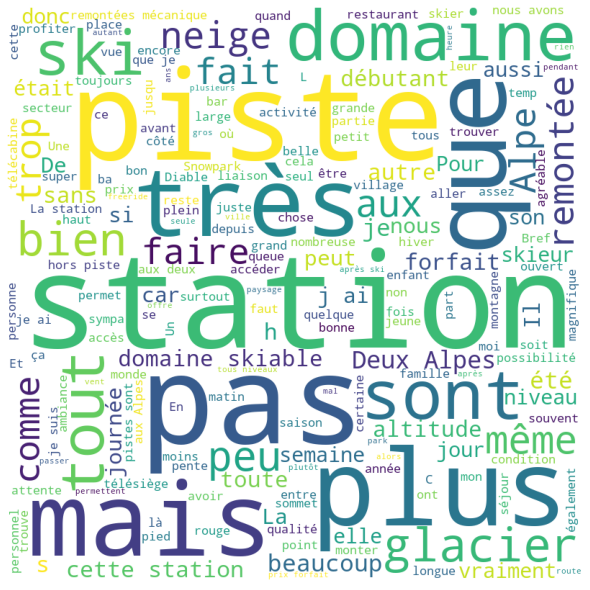

In [5]:
# Create a word cloud of the 50 most frequent words
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("les2alpes_wordcloud.jpg")
plt.show()

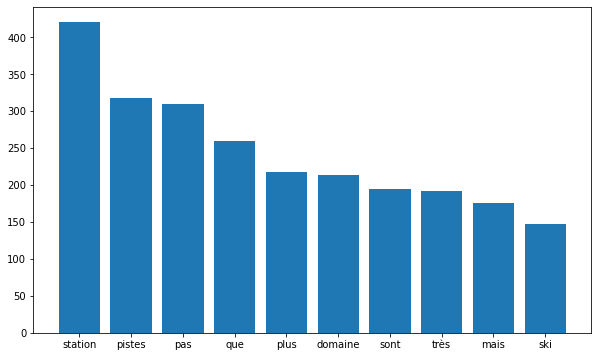

In [6]:
# Create a bar chart of the 10 most frequent words
words = text.split()
word_counts = Counter(words)
top_words = word_counts.most_common(10)
labels, values = zip(*top_words)
plt.figure(figsize=(10,6))
plt.bar(labels, values)
plt.show()

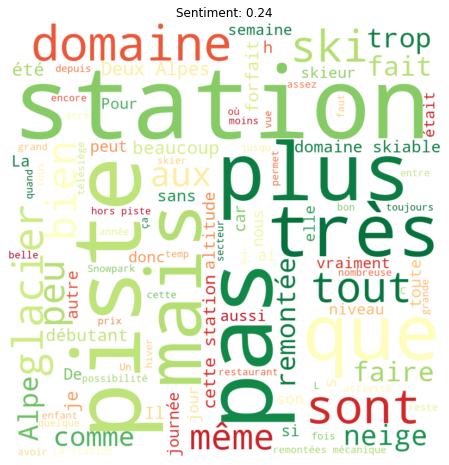

In [7]:
blob = TextBlob(text)
polarity = blob.sentiment.polarity

# Generate word cloud with sentiment-colored words
wc = WordCloud(background_color="white", width=800, height=800,
               colormap="RdYlGn", prefer_horizontal=0.7,
               max_words=100, random_state=35).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title(f'Sentiment: {polarity:.2f}')
plt.savefig("les2alpes_sentiments.jpg", bbox_inches='tight')
plt.show()

In [8]:
# initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# obtain the sentiment score using VADER
sentiment_scores = sid.polarity_scores(text)

# print the sentiment score
print(sentiment_scores)

{'neg': 0.023, 'neu': 0.948, 'pos': 0.028, 'compound': 0.9992}


In [9]:
data = pd.DataFrame(list(sentiment_scores.items()), columns=['Key', 'Value'])
data = data.reset_index(drop=True)

df = data.drop(data.index[-1])
df = df.sort_values('Value', ascending=False).reset_index(drop=True)
df

,Key,Value
0,neu,0.948
1,pos,0.028
2,neg,0.023


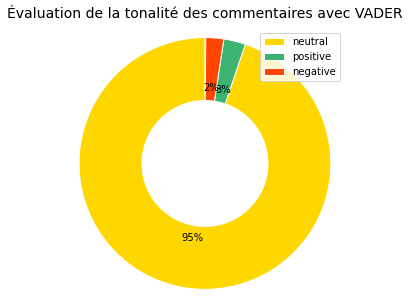

In [10]:
colors = ['gold', 'mediumseagreen', 'orangered']
plt.figure(figsize=(5, 5), facecolor=None)
plt.pie(df['Value'],
        wedgeprops = {'linewidth':1, 'edgecolor':'white', 'width': 0.5},
        labels=None, autopct='%1.0f%%',
        colors=colors,
        startangle = 90)
plt.axis('equal')
plt.title('Évaluation de la tonalité des commentaires avec VADER', fontsize=14, pad=10)
plt.legend(['neutral', 'positive', 'negative'])
plt.savefig("les2alpes_VADER.jpg", bbox_inches='tight')
plt.show()

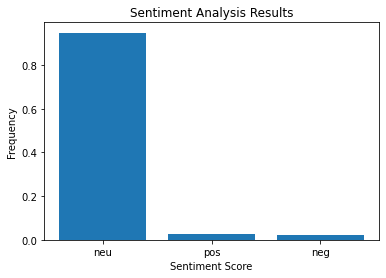

In [11]:
# Create a bar chart
plt.bar(df.Key, df.Value)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Results')
plt.show()

In [12]:
from nltk import FreqDist

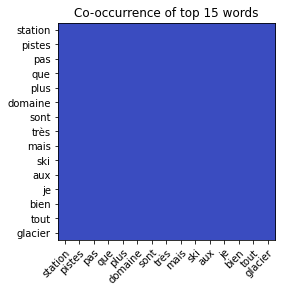

<Figure size 720x432 with 0 Axes>

In [13]:
# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Find the 10 most frequent words
fdist = FreqDist(tokens)
top_words = [word for word, _ in fdist.most_common(15)]

# Create a co-occurrence matrix for the top words
co_matrix = np.zeros((15, 15))
for i, word1 in enumerate(top_words):
    for j, word2 in enumerate(top_words):
        if i != j:
            co_matrix[i][j] = tokens.count(word1 + ' ' + word2)

# Create a heatmap of the co-occurrence matrix
fig, ax = plt.subplots()
im = ax.imshow(co_matrix, cmap="coolwarm")

# Set the tick labels
ax.set_xticks(np.arange(len(top_words)))
ax.set_yticks(np.arange(len(top_words)))
ax.set_xticklabels(top_words)
ax.set_yticklabels(top_words)

# Rotate the tick labels and set the axis labels
plt.figure(figsize=(10,6))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Co-occurrence of top 15 words")
#ax.set_xlabel("Word")
#ax.set_ylabel("Word")

# Display the heatmap
plt.show()

In [14]:
les2alpes = pd.read_excel('les2alpes.xlsx')

In [15]:
les2alpes.head()

,id,date,point,meteo,visite,forfait,reviendrais
0,0,2023-03-05,1,bonne,famille,non,non
1,1,2023-02-22,1,bonne,famille,non,non
2,2,2023-02-21,1,bonne,famille,non,non
3,3,2022-11-28,3,variable,couple,non,oui
4,4,2022-10-27,4,variable,amis,non,oui


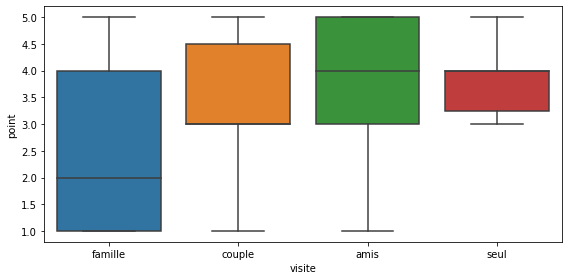

In [16]:
fig = plt.figure(figsize=(8, 4))
sns.boxplot(y='point', x='visite', data=les2alpes)
fig.tight_layout()
# plt.savefig("cervae_body_size_boxplot_outliers.jpg", dpi = 600)

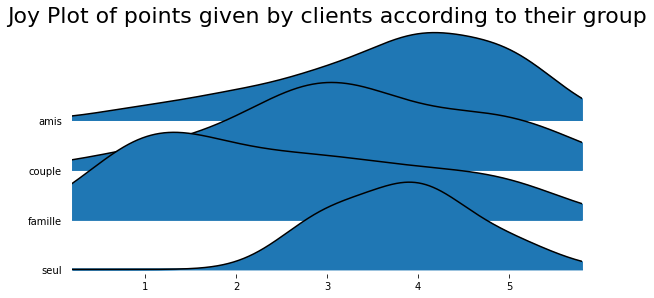

In [17]:
import joypy

# Draw Plot
fig, axes = joypy.joyplot(les2alpes, column=['point', 'reviendrais'], by="visite", ylim='own', figsize=(8,4))

# Decoration
plt.title('Joy Plot of points given by clients according to their group', fontsize=22)
plt.show()

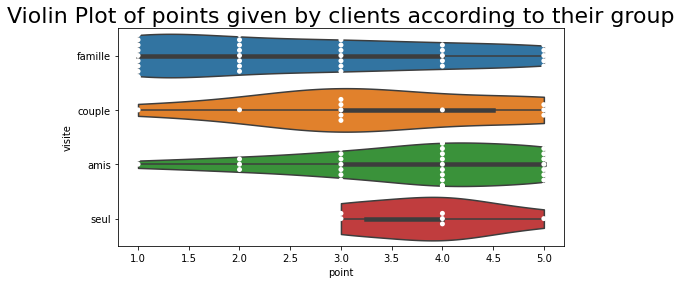

In [18]:
plt.figure(figsize=(8,4))
sns.violinplot(x='point', y='visite', data=les2alpes, scale = 'width', cut = 0)
sns.swarmplot(x='point', y='visite', data=les2alpes, color= "white")
# Decoration
plt.title('Violin Plot of points given by clients according to their group', fontsize=22)
plt.show()

In [19]:
df_counts = les2alpes.groupby(['point', 'visite']).size().reset_index(name='counts')
df_counts

,point,visite,counts
0,1,amis,2
1,1,couple,1
2,1,famille,14
3,2,amis,4
4,2,couple,1
5,2,famille,8
6,3,amis,7
7,3,couple,5
8,3,famille,8
9,3,seul,2


In [20]:
df_mean = les2alpes.groupby(['visite']).mean().reset_index()
df_mean

,visite,id,point
0,amis,47.891892,3.729730
1,couple,57.818182,3.363636
2,famille,50.166667,2.571429
3,seul,70.666667,3.833333


<AxesSubplot:xlabel='visite', ylabel='point'>

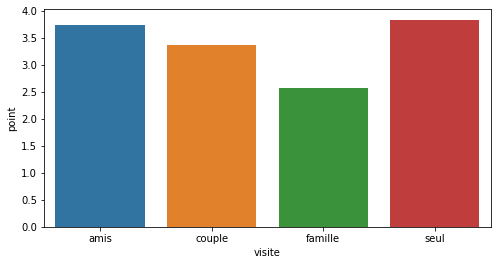

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_mean, x="visite", y="point")

<AxesSubplot:xlabel='visite', ylabel='point'>

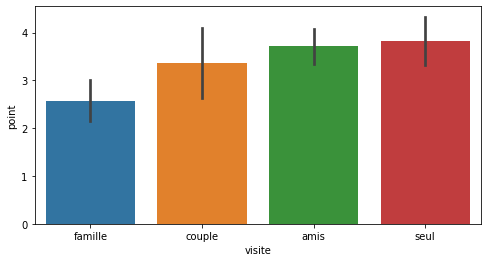

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(data=les2alpes, x="visite", y="point")

<AxesSubplot:xlabel='visite', ylabel='point'>

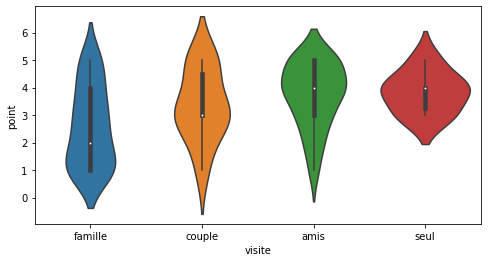

In [23]:
plt.figure(figsize=(8,4))
sns.violinplot(data=les2alpes, x="visite", y="point")

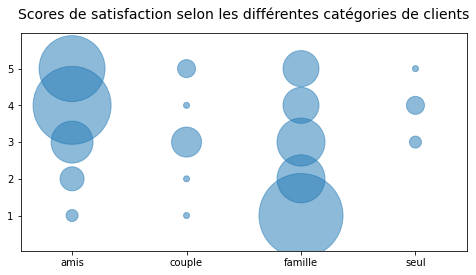

In [24]:
plt.figure(figsize=(8,4))
x = df_counts['visite']
y = df_counts['point']
area = (6*df_counts['counts'])**2
plt.scatter(x, y, s=area, alpha=0.5)
plt.margins(x=0.15, y=0.24)
plt.title('Scores de satisfaction selon les différentes catégories de clients', fontsize=14, pad=15)
plt.savefig("les2alpes_scores.jpg", bbox_inches='tight')
plt.show()

<Figure size 648x360 with 0 Axes>

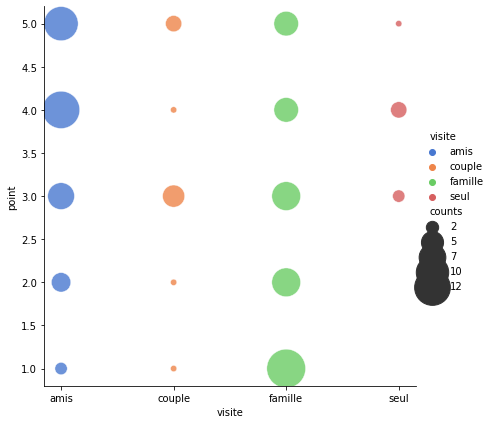

In [25]:
# Plot miles per gallon against horsepower with other semantics
fig = plt.figure(figsize=(9,5))
sns.relplot(x="visite", y="point", hue="visite", size="counts",
            sizes=(40, 1500), alpha=.8, palette="muted",
            height=6, data=df_counts)
plt.show()

In [26]:
import scipy
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import t
import datetime

In [27]:
format_string = '%Y-%m-%d %H:%M:%S'
les2alpes['date'] = pd.to_datetime(les2alpes['date'], format=format_string)

In [28]:
les2alpes['date'] = pd.to_datetime(les2alpes['date'], format='%Y-%m-%d')

In [29]:
les2alpes['retourns'] = les2alpes['reviendrais'].map({'non': False, 'oui': True})

In [30]:
les2alpes.head()

,id,date,point,meteo,visite,forfait,reviendrais,retourns
0,0,2023-03-05,1,bonne,famille,non,non,False
1,1,2023-02-22,1,bonne,famille,non,non,False
2,2,2023-02-21,1,bonne,famille,non,non,False
3,3,2022-11-28,3,variable,couple,non,oui,True
4,4,2022-10-27,4,variable,amis,non,oui,True


In [31]:
correlations = les2alpes[['point', 'meteo', 'visite', 'retourns']]

In [32]:
correlations.head()

,point,meteo,visite,retourns
0,1,bonne,famille,False
1,1,bonne,famille,False
2,1,bonne,famille,False
3,3,variable,couple,True
4,4,variable,amis,True


In [33]:
unique_values = les2alpes['visite'].unique()
unique_values

array(['famille', 'couple', 'amis', 'seul', nan], dtype=object)

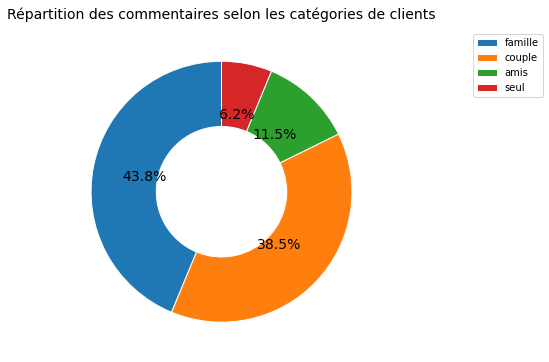

In [34]:
plt.figure(figsize=(6, 6), facecolor=None)
y = les2alpes['visite'].value_counts()
#mylabels = ["vrais billets", "faux billets"]
plt.title("Répartition des commentaires selon les catégories de clients", fontsize=14, pad=10)
plt.pie(y, autopct='%1.1f%%', wedgeprops = {'linewidth':1, 'edgecolor':'white', 'width': 0.5}, textprops={'fontsize': 14}, startangle = 90)
plt.legend(unique_values,  bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("les2alpes_categ_commentaires.jpg", bbox_inches='tight')
plt.show()

**CONCLUSION** : Les clients ayant visité Les 2 Alpes en couple ou en famille ont tendance à écrire davantage de commentaires sur leur expérience.


In [35]:
les2alpes['date'] = les2alpes['date'].astype(str)

In [36]:
les2alpes['year'] = les2alpes['date'].str.split('-', n=1, expand=True) [0]

In [37]:
les2alpes['month'] = les2alpes['date'].str.split('-', n=2, expand=True) [1]

In [38]:
les2alpes['day'] = les2alpes['date'].str.split(' ', n=1, expand=True) [0]

In [39]:
les2alpes['year_month'] = les2alpes[['year','month']].apply(lambda x : '{}{}{}'.format(x[0], '-', x[1]), axis=1)

In [40]:
les2alpes.head()

,id,date,point,meteo,visite,forfait,reviendrais,retourns,year,month,day,year_month
0,0,2023-03-05,1,bonne,famille,non,non,False,2023,03,2023-03-05,2023-03
1,1,2023-02-22,1,bonne,famille,non,non,False,2023,02,2023-02-22,2023-02
2,2,2023-02-21,1,bonne,famille,non,non,False,2023,02,2023-02-21,2023-02
3,3,2022-11-28,3,variable,couple,non,oui,True,2022,11,2022-11-28,2022-11
4,4,2022-10-27,4,variable,amis,non,oui,True,2022,10,2022-10-27,2022-10


In [41]:
X = "year"
Y = "visite"

categories_count = les2alpes[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
categories_count.fillna(0, inplace=True)
categories_count

visite,amis,couple,famille,seul,Total
year,,,,,
2013,1.0,1.0,2.0,0.0,4
2015,0.0,0.0,1.0,1.0,2
2016,0.0,0.0,1.0,0.0,1
2017,3.0,1.0,3.0,1.0,8
2018,6.0,3.0,8.0,2.0,19
2019,17.0,3.0,12.0,1.0,33
2020,7.0,2.0,6.0,0.0,15
2021,1.0,0.0,4.0,0.0,5
2022,2.0,1.0,2.0,1.0,6


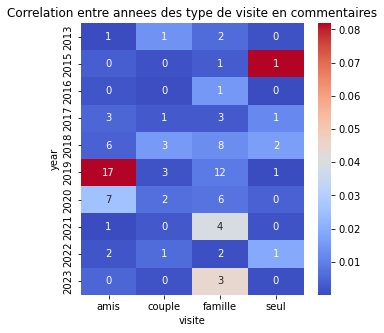

In [42]:
plt.rcParams["figure.figsize"] = (5,5)
tx = categories_count.loc[:,["Total"]]
ty = categories_count.loc[["Total"],:]
n = len(les2alpes)
indep = tx.dot(ty) / n

c = categories_count.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap="coolwarm").set_title('Correlation entre annees des type de visite en commentaires')
plt.show()

In [43]:
X1 = "reviendrais"
Y1 = "visite"

visit_retourn = les2alpes[[X1,Y1]].pivot_table(index=X1,columns=Y1,aggfunc=len,margins=True,margins_name="total")
visit_retourn

visite,amis,couple,famille,seul,total
reviendrais,,,,,
non,10,4,23,2,39
oui,27,7,18,4,56
total,37,11,41,6,95


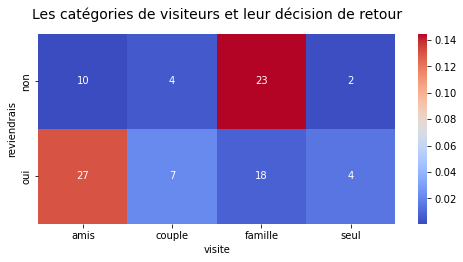

In [44]:
plt.figure(figsize=(8, 3.5), facecolor=None)
tx1 = visit_retourn.loc[:,["total"]]
ty1 = visit_retourn.loc[["total"],:]
n = len(les2alpes)
indep1 = tx1.dot(ty1) / n

c1 = visit_retourn.fillna(0)
measure1 = (c1-indep1)**2/indep1
xi_n1 = measure1.sum().sum()
table1 = measure1/xi_n1
sns.heatmap(table1.iloc[:-1,:-1],annot=c1.iloc[:-1,:-1], cmap="coolwarm")
plt.title('Les catégories de visiteurs et leur décision de retour', fontsize=14, pad=15)
plt.savefig("les2alpes_categ_retour.jpg", bbox_inches='tight')
plt.show()

In [45]:
st.chi2_contingency(observed = visit_retourn)

(7.0903587367002,
 0.5269158133440792,
 8,
 array([[15.18947368,  4.51578947, 16.83157895,  2.46315789, 39.        ],
        [21.81052632,  6.48421053, 24.16842105,  3.53684211, 56.        ],
        [37.        , 11.        , 41.        ,  6.        , 95.        ]]))

**COMMENTAIRES** :
Les résultats de st.chi2_contingency(observed=visit_retourn) fournissent les informations suivantes :

**Test du chi-deux** : La statistique du test du chi-deux est de 7.0903587367002.

**Valeur p** : La valeur p associée à ce test est de 0.5269158133440792.

**Degrés de liberté** : Il y a 8 degrés de liberté dans ce test.

**Fréquences attendues** : Les fréquences attendues sont présentées dans un tableau, avec trois lignes correspondant aux différentes catégories de variables et cinq colonnes représentant les niveaux des variables.

Pour interpréter ces résultats, on se concentre principalement sur la valeur p. Une valeur p élevée (0.5269) suggère **qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle** d'indépendance entre les variables. Cela signifie qu'il n'y a pas de relation significative entre les variables analysées dans votre tableau de contingence.

In [46]:
X2 = "reviendrais"
Y2 = "meteo"

meteo_retourn = les2alpes[[X2,Y2]].pivot_table(index=X2,columns=Y2,aggfunc=len,margins=True,margins_name="total")
meteo_retourn.fillna(0, inplace=True)
meteo_retourn

meteo,bonne,excellente,mauvese,variable,total
reviendrais,,,,,
non,12.0,6.0,1.0,17.0,36
oui,16.0,9.0,0.0,16.0,41
total,28.0,15.0,1.0,33.0,77


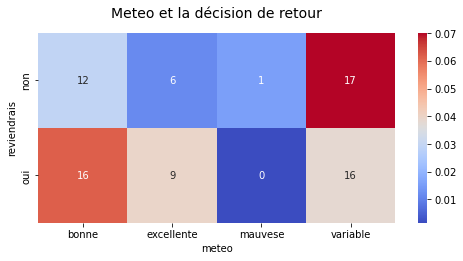

In [47]:
plt.figure(figsize=(8, 3.5), facecolor=None)
tx2 = meteo_retourn.loc[:,["total"]]
ty2 = meteo_retourn.loc[["total"],:]
n = len(les2alpes)
indep2 = tx2.dot(ty2) / n

c2 = meteo_retourn.fillna(0)
measure2 = (c2-indep2)**2/indep2
xi_n2 = measure2.sum().sum()
table2 = measure2/xi_n2
sns.heatmap(table2.iloc[:-1,:-1],annot=c2.iloc[:-1,:-1], cmap="coolwarm")
plt.title('Meteo et la décision de retour', fontsize=14, pad=15)
plt.savefig("les2alpes_meteo_retour.jpg", bbox_inches='tight')
plt.show()

**COMMENTAIRE** : L'indice de corrélation est très proche de 0, ce qui signifie que la relation entre les conditions météorologiques et la décision du client de retourner dans la station est pratiquement inexistante

In [48]:
st.chi2_contingency(observed = meteo_retourn)

(1.8850045167118343,
 0.9843365694304141,
 8,
 array([[13.09090909,  7.01298701,  0.46753247, 15.42857143, 36.        ],
        [14.90909091,  7.98701299,  0.53246753, 17.57142857, 41.        ],
        [28.        , 15.        ,  1.        , 33.        , 77.        ]]))

**COMMENTAIRE** : Les résultats de st.chi2_contingency(observed=meteo_retourn) représentent le test du chi-deux, la valeur p, les degrés de liberté et les fréquences attendues.

**Test du chi-deux** : La première valeur (1.8850045167118343) est la statistique du test du chi-deux. Elle mesure l'écart entre les fréquences observées et les fréquences qui seraient attendues s'il n'y avait aucune association entre les variables. Des valeurs plus élevées indiquent un écart plus important.

**Valeur p** : La deuxième valeur (0.9843365694304141) est la valeur p associée à la statistique du test du chi-deux. Elle indique la probabilité d'observer les données ou des résultats plus extrêmes si l'hypothèse nulle (aucune association entre les variables) était vraie. Dans ce cas, la valeur p est élevée (proche de 1), suggérant une faible preuve contre l'hypothèse nulle.

**Degrés de liberté** : La troisième valeur (8) représente les degrés de liberté, calculés en fonction des dimensions du tableau de contingence.

**Fréquences attendues** : La quatrième valeur est un tableau des fréquences attendues sous l'hypothèse nulle. Ces fréquences représentent ce qui serait attendu s'il n'y avait aucune association entre les variables. Chaque cellule du tableau correspond à une combinaison de catégories des variables analysées.

Pour interpréter ces résultats, on regard sur la valeur p. Puisque la valeur p est élevée (0.984), cela suggère **qu'il y a peu de preuves pour rejeter l'hypothèse nulle** d'indépendance entre les variables. En d'autres termes, il peut ne pas y avoir une association significative entre les variables représentées dans le tableau de contingence. 

**CONCLUSIONS** : 
- Les clients visitant la station en famille sont les plus exigeants et, en même temps, les plus actifs dans leurs commentaires sur leur expérience. Cette circonstance doit être prise en compte par les services de marketing et de communication.
- Les clients visitant la station entre amis ont généralement une très bonne impression de Les 2 Alpes, mais sont moins actifs dans leurs commentaires.